In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

#load data
sineFits = pd.read_csv('All_fitted_sine.csv', delimiter=';')
days = pd.read_csv('days.csv', delimiter=';')
days = days[['Day']].values.flatten()
inSarData = pd.read_csv('VERT_AUG_2020_CAL_GNSS.csv', delimiter=';')

In [68]:
#specify station name
staID = 'BOVKMSX'
rowID = np.where(sineFits[['CODE']] == staID)[0][0]

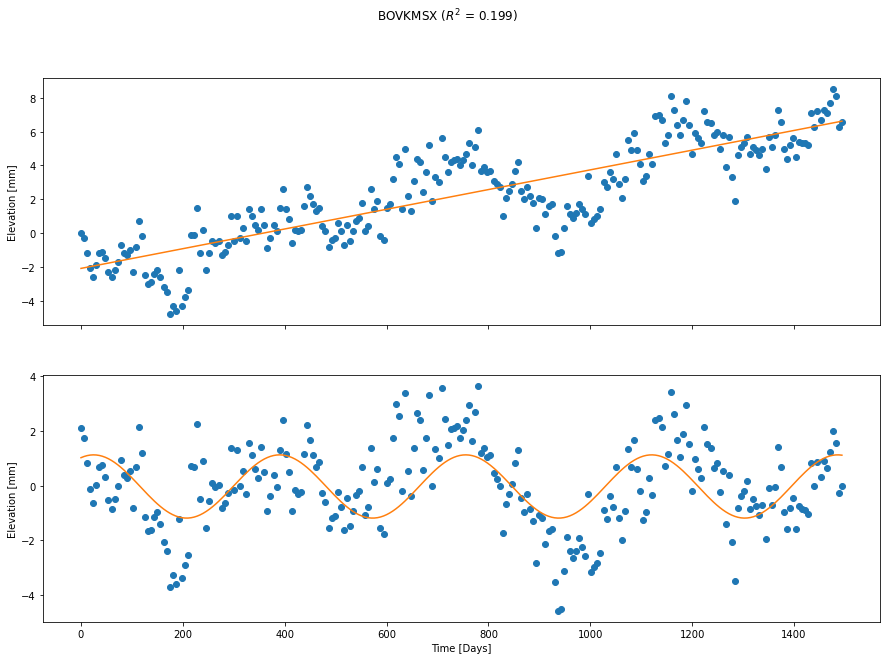

In [98]:
#plot data
measZ = inSarData.values[rowID,3:253]
measZ2 = signal.detrend(measZ) #detrend data

l = sineFits.values[rowID,5] * (2*np.pi/365.25)
A = sineFits.values[rowID,6]
B = sineFits.values[rowID,7]
c = sineFits.values[rowID,3]
m = sineFits.values[rowID,4]
predZ = A*np.sin(x+l) + B

fig, axs = plt.subplots(2, sharex=True, figsize=(15,10))
fig.suptitle(staID + ' ($R^{2}$ = ' + str(np.round(sineFits.values[rowID,9],3)) + ')')
axs[0].plot(days, measZ, 'o')
axs[0].set_ylabel('Elevation [mm]')
axs[0].plot(days, m/365.25 * days + c)

axs[1].plot(days, measZ2, 'o')
axs[1].set_ylabel('Elevation [mm]')
axs[1].set_xlabel('Time [Days]')
axs[1].plot(days, predZ)